## UTMCC DataViz Module 20 Final Team Project
### Food Deserts in the Austin, Texas Metro Area

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from scipy import stats
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
# import datetime as dt
# import calendar
# import random

# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
# import matplotlib.pyplot as plt
# import statistics
# from flask import Flask, jsonify
# from mpl_toolkits.mplot3d import Axes3D

# # Python SQL toolkit and Object Relational Mapper
# import sqlite3
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
# from sqlalchemy import extract

In [3]:
# Import and read csv files
food_atlas_df = pd.read_csv("resources/food_desert_austin_censustract.csv")
# food_var_df = pd.read_csv("resources/food_access_variable_lookup.csv")

In [4]:
food_atlas_df.head()

,Unnamed: 0,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,61529,48021950100,Texas,Bastrop,0,8608,3063,0,0,0.000000,...,1028,6507,383,53,4,65,1596,2660,51,351
1,61530,48021950200,Texas,Bastrop,1,7955,2625,0,186,0.023381,...,891,4521,1328,32,14,76,1984,3674,148,444
2,61531,48021950300,Texas,Bastrop,0,12927,4734,0,71,0.005492,...,1468,9971,1213,156,18,88,1481,3012,95,568
3,61532,48021950400,Texas,Bastrop,1,7984,3127,0,456,0.057114,...,1199,6312,800,78,3,62,729,1711,255,261
4,61533,48021950501,Texas,Bastrop,0,8008,2168,0,1519,0.189685,...,566,5209,849,37,12,123,1778,3253,128,285


In [5]:
# food_var_df.head()

## Preprocessing the data

In [5]:
food_atlas_df.dtypes

Unnamed: 0        int64
CensusTract       int64
State            object
County           object
Urban             int64
                  ...  
TractAIAN         int64
TractOMultir      int64
TractHispanic     int64
TractHUNV         int64
TractSNAP         int64
Length: 148, dtype: object

In [6]:
# Create new df keeping only Texas
food_texas_df = food_atlas_df[(food_atlas_df["State"]=="Texas")]
food_texas_df

,Unnamed: 0,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,61529,48021950100,Texas,Bastrop,0,8608,3063,0,0,0.000000,...,1028,6507,383,53,4,65,1596,2660,51,351
1,61530,48021950200,Texas,Bastrop,1,7955,2625,0,186,0.023381,...,891,4521,1328,32,14,76,1984,3674,148,444
2,61531,48021950300,Texas,Bastrop,0,12927,4734,0,71,0.005492,...,1468,9971,1213,156,18,88,1481,3012,95,568
3,61532,48021950400,Texas,Bastrop,1,7984,3127,0,456,0.057114,...,1199,6312,800,78,3,62,729,1711,255,261
4,61533,48021950501,Texas,Bastrop,0,8008,2168,0,1519,0.189685,...,566,5209,849,37,12,123,1778,3253,128,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,66673,48491021507,Texas,Williamson,1,9196,3293,0,1,0.000109,...,444,6315,1227,421,15,44,1174,2710,179,277
346,66674,48491021508,Texas,Williamson,1,6531,2402,0,0,0.000000,...,301,4744,761,303,7,28,688,1627,23,133
347,66675,48491021601,Texas,Williamson,0,3278,1120,0,0,0.000000,...,236,2569,102,19,6,15,567,954,5,26
348,66676,48491021602,Texas,Williamson,0,2857,959,0,0,0.000000,...,332,2464,47,19,0,16,311,906,12,106


In [7]:
# Create new df keeping only select Counties in the Austin Metro Area
counties = ["Bastrop", "Caldwell", "Hays", "Travis", "Williamson"]
food_austin_df = food_texas_df.loc[food_texas_df["County"].isin(counties)]
food_austin_df

,Unnamed: 0,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,61529,48021950100,Texas,Bastrop,0,8608,3063,0,0,0.000000,...,1028,6507,383,53,4,65,1596,2660,51,351
1,61530,48021950200,Texas,Bastrop,1,7955,2625,0,186,0.023381,...,891,4521,1328,32,14,76,1984,3674,148,444
2,61531,48021950300,Texas,Bastrop,0,12927,4734,0,71,0.005492,...,1468,9971,1213,156,18,88,1481,3012,95,568
3,61532,48021950400,Texas,Bastrop,1,7984,3127,0,456,0.057114,...,1199,6312,800,78,3,62,729,1711,255,261
4,61533,48021950501,Texas,Bastrop,0,8008,2168,0,1519,0.189685,...,566,5209,849,37,12,123,1778,3253,128,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,66673,48491021507,Texas,Williamson,1,9196,3293,0,1,0.000109,...,444,6315,1227,421,15,44,1174,2710,179,277
346,66674,48491021508,Texas,Williamson,1,6531,2402,0,0,0.000000,...,301,4744,761,303,7,28,688,1627,23,133
347,66675,48491021601,Texas,Williamson,0,3278,1120,0,0,0.000000,...,236,2569,102,19,6,15,567,954,5,26
348,66676,48491021602,Texas,Williamson,0,2857,959,0,0,0.000000,...,332,2464,47,19,0,16,311,906,12,106


In [8]:
#begin income column creation (target variable)
food_austin_df['MedianFamilyIncome']

0      70516
1      67792
2      75462
3      62375
4      65079
       ...  
345    66820
346    83241
347    57389
348    63125
349    58902
Name: MedianFamilyIncome, Length: 350, dtype: int64

In [9]:
conditions = [(food_austin_df['MedianFamilyIncome'] <= 15000), 
              (food_austin_df['MedianFamilyIncome'] > 15000)]
values = ['Impovrished', 'Not Impovrished']
food_austin_df["Income"] = np.select(conditions, values)
food_austin_df.head()

,Unnamed: 0,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Income
0,61529,48021950100,Texas,Bastrop,0,8608,3063,0,0,0.000000,...,6507,383,53,4,65,1596,2660,51,351,Not Impovrished
1,61530,48021950200,Texas,Bastrop,1,7955,2625,0,186,0.023381,...,4521,1328,32,14,76,1984,3674,148,444,Not Impovrished
2,61531,48021950300,Texas,Bastrop,0,12927,4734,0,71,0.005492,...,9971,1213,156,18,88,1481,3012,95,568,Not Impovrished
3,61532,48021950400,Texas,Bastrop,1,7984,3127,0,456,0.057114,...,6312,800,78,3,62,729,1711,255,261,Not Impovrished
4,61533,48021950501,Texas,Bastrop,0,8008,2168,0,1519,0.189685,...,5209,849,37,12,123,1778,3253,128,285,Not Impovrished


In [10]:
# Create new df with select feature columns
column_list_number= ['lasnaphalf','lahunvhalf', 'lasnap1', 'lahunv1', 'lasnap10', 'lahunv10', 'lasnap20', 'lahunv20']
column_list_share= ['lasnaphalfshare', 'lahunvhalfshare', 'lasnap1share', 'lahunv1share', 'lasnap10share', 'lahunv10share', 'lasnap20share', 'lahunv20share']
food_desert_df = food_austin_df[column_list_number]
food_desert_df


,lasnaphalf,lahunvhalf,lasnap1,lahunv1,lasnap10,lahunv10,lasnap20,lahunv20
0,325.133846,48.548857,319.907937,47.889963,5.159378,0.922672,0.0,0.0
1,368.584869,120.671667,233.501673,81.658810,0.000000,0.000000,0.0,0.0
2,590.025451,100.788957,549.545092,84.946165,48.577263,8.752010,0.0,0.0
3,241.111748,191.810180,188.984455,114.453080,0.000000,0.000000,0.0,0.0
4,307.709167,144.460704,307.703411,144.458152,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
345,253.269297,147.346423,200.157469,94.092539,0.000000,0.000000,0.0,0.0
346,65.461476,3.168106,37.486129,0.346386,0.000000,0.000000,0.0,0.0
347,24.931507,6.618853,24.931507,6.618853,15.243362,2.243933,0.0,0.0
348,104.153688,13.420352,104.153688,13.420352,0.000000,0.000000,0.0,0.0


In [ ]:
column_list_number= ['lasnaphalf','lahunvhalf', 'lasnap1', 'lahunv1', 'lasnap10', 'lahunv10', 'lasnap20', 'lahunv20']
column_list_share= ['lasnaphalfshare', 'lahunvhalfshare', 'lasnap1share', 'lahunv1share', 'lasnap10share', 'lahunv10share', 'lasnap20share', 'lahunv20share']

## Machine Learning Model

In [11]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(food_austin_df.Income.values.reshape(-1,1)))

# Rename encoded columns
encode_df.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [12]:
# Split the preprocessed dataframe from the SQLite database into our features and target arrays
#  Remove LILATracts_1And10 target from features data
y = encode_df
X = food_desert_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
y.describe()

,0,1
count,350.0000,350.0000
mean,0.0200,0.9800
std,0.1402,0.1402
min,0.0000,0.0000
25%,0.0000,1.0000
50%,0.0000,1.0000
75%,0.0000,1.0000
max,1.0000,1.0000


In [14]:
# Scale X
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Scale Y
# One-hot encoding
y_train_categorical = to_categorical(y_train,2)
y_test_categorical = to_categorical(y_test,2)

In [16]:
# Define the model - deep neural net. the number of input features and the hidden nodes for each layer.
# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in 
# the hidden layer as the number of inputs.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=2, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile and train the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.9771
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.9809
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.9809
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.9809
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.9809
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.9809
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9809
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9809
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9809
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9809
Epoch 11/50
9/9 [======================

In [19]:
# Evaluate the model using the test data (Not using share)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.1115 - accuracy: 0.9773
Loss: 0.11148861050605774, Accuracy: 0.9772727489471436


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.1008 - accuracy: 0.9773
Loss: 0.10075216740369797, Accuracy: 0.9772727489471436


In [22]:
# # Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# # Export our model to HDF5 file
nn.save("food_desert_austin.h5")

## Other, Plotting and Charting 

In [23]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

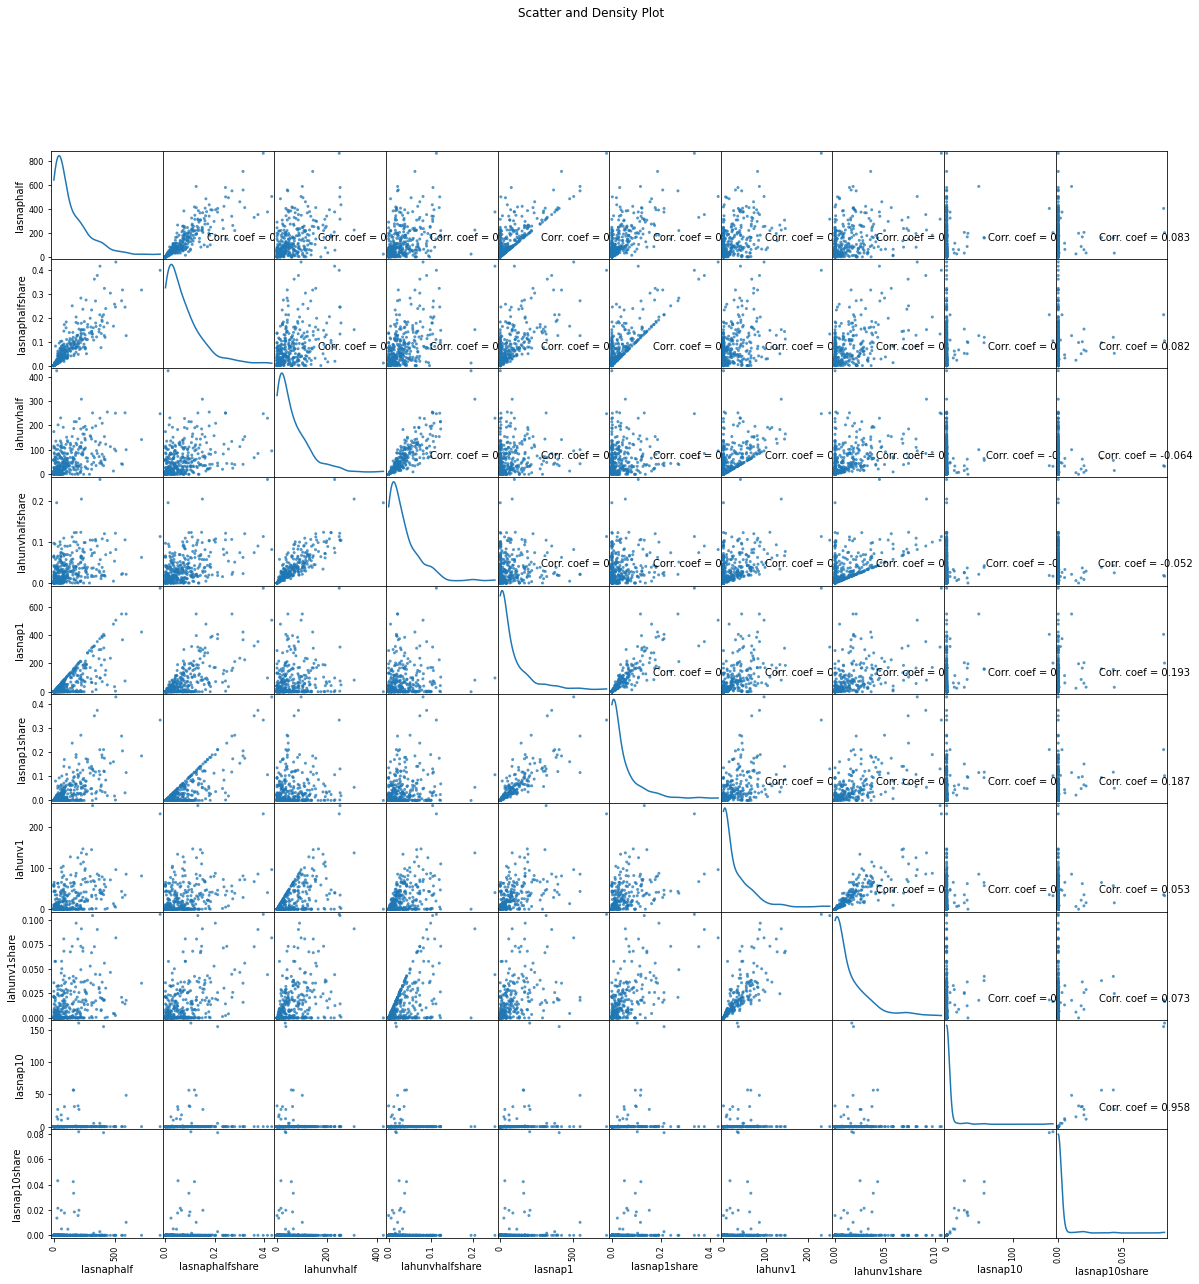

In [24]:
plotScatterMatrix(food_desert_df, 20, 10)

In [25]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = food_desert_df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

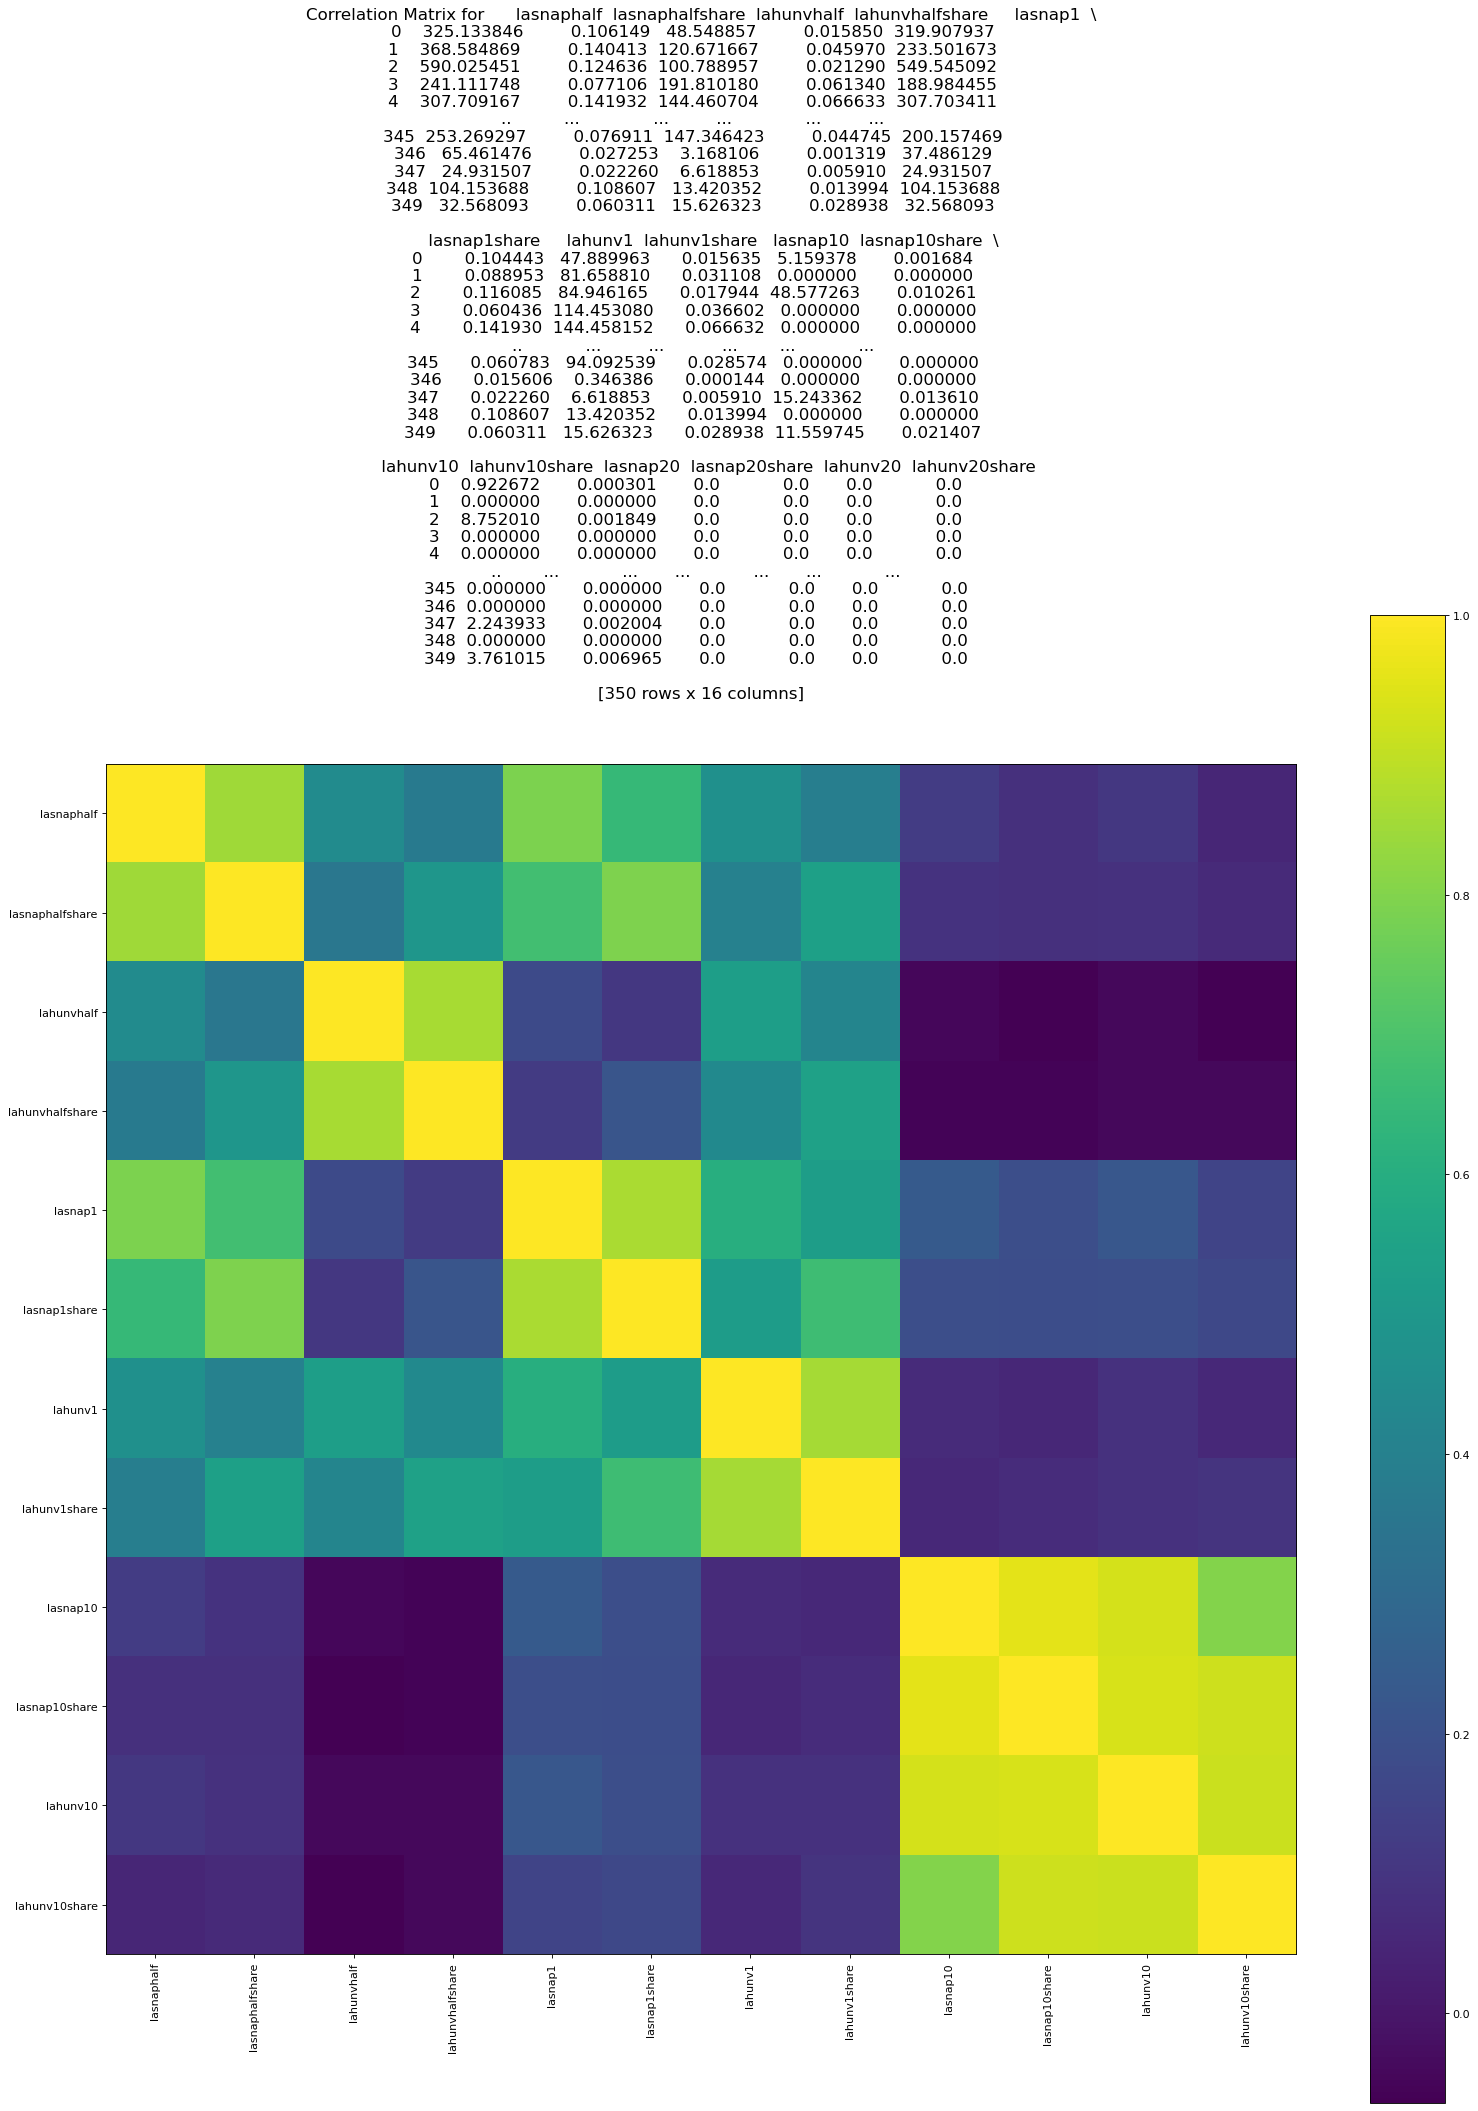

In [26]:
plotCorrelationMatrix(food_desert_df, 24)